In [62]:
## Jennifer Vesper - Lab 4 - DAT 301 ##

# LAB 4
# Webscraping


In this lab you are supposed to write a code that webscrapes data from the website <a href="http://books.toscrape.com">http://books.toscrape.com</a>. This website was made for the purpose of practicing webscraping.<br>
In fact, the code is already prepared for you and you just need to replace the commented text: <br> 
<font color=#339988><i><b>
\#YOUR CODE HERE!!!</b></i></font> <br>
with appropriate codes.

**When you are done, submit both your modified Lab4.ipynb file and its html version Lab4.html. To convert ipynb to html, inside Jupyter dashboard (where your ipynb file is open), go to File $\to$ Donwload as $\to$ HTML (.html)**

In [63]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')

##above I imported warnings, as i was getting a longgg list of warnings for number 1


In [64]:
# vector of column names to be used in a data frame
columnHeaders = ['Title', 'Price', 'Rating', 'Link']



#Create an empty pandas dataframe called "df" with column headers given in the vector columnHeaders
df = pd.DataFrame(columns=columnHeaders)
df


,Title,Price,Rating,Link


The following code cell contains a while-loop for grabbing different pages.
First page to begin with is <a href="http://books.toscrape.com/catalogue/page-1.html">http://books.toscrape.com/catalogue/page-1.html</a> <br>
You will need to create a string variable `url` which in the first iteration will be exactly <br>
http://books.toscrape.com/catalogue/page-1.html <br>
In the second iteration of the while-loop, the `url` variable will take the value <br>
http://books.toscrape.com/catalogue/page-2.html, <br>
in the third, <br>
http://books.toscrape.com/catalogue/page-3.html <br>
and so on.

In [37]:
# Create a counter for the while loop to follow, will denote page number in loop
counter = 1


# Create a loop to loop through all the different pages on the webpage
while counter <= 50:
    
    # Define a dynamic url to get to the next page in every iteration of the while-loop.
    # The variable url should be a string, which changes from iteration to iteration
    # in the way described in the markdown cell above
   
    #so when it iterates through the while loop it increases the page number in string format so it can be concatonated
    pageNum = str(counter) + ".html"   
    url = "http://books.toscrape.com/catalogue/page-" + pageNum
    
    
    # Use the requests library to send a get-request for the current url
    page = requests.get(url)
    
    # Use Beautiful Soup library to create a soup object that allows us to parse the html content of the page we got
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Find all the tags that contain the information we would like to collect per book using Beautiful Soup find_all method
    # and store them into lists
    price = soup.find_all('p', attrs={'class':'price_color'}) # p-tags (paragraphs) whose class is named 'price_color'
    title = soup.find_all('h3')  # h3-tags (level 3 headers) 
    rating = soup.find_all('p', attrs={'class':'star-rating'})  # p-tags whose class is named 'star-rating'
    #create a list called 'link' which consists of div-tags (div is one of the html tags), whose class 
    #is named 'image_container'; this list should be created in similar fashion as lists price, title and rating
    ##################
    link = soup.find_all('div', attrs = {'class':'image_container'})
    ##################
    
    # Note: The length of the lists created in the last step are all the same, since those specific tags only exist per book.
    # iterating through the ranges of the list, append each book's information to the dataframe created earlier
    for i in range(len(price)):
        df = df.append({'Title': title[i].a.get('title'), 'Price': price[i].get_text(), 
                        'Rating': rating[i].get('class')[1], 'Link': link[i].a.get('href')}, ignore_index = True)
    
    #Print Counter to ensure loop is running properly, optional
    print(counter)
    
    #Increase counter at the end of the loop to change the url during next loop iteration
    counter = counter + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


### From now on it's about pandas 

In [38]:
# Print the head of the dataframe to sanity check
print(df.head())

                                   Title   Price Rating  \
0                   A Light in the Attic  £51.77  Three   
1                     Tipping the Velvet  £53.74    One   
2                             Soumission  £50.10    One   
3                          Sharp Objects  £47.82   Four   
4  Sapiens: A Brief History of Humankind  £54.23   Five   

                                                Link  
0               a-light-in-the-attic_1000/index.html  
1                  tipping-the-velvet_999/index.html  
2                          soumission_998/index.html  
3                       sharp-objects_997/index.html  
4  sapiens-a-brief-history-of-humankind_996/index...  


In [39]:
# Print the tail of the dataframe to sanity check (there shold be 1000 observations in total, so the last index is 999)
print(df.tail())

                                                 Title   Price Rating  \
995  Alice in Wonderland (Alice's Adventures in Won...  £55.53    One   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)  £57.06   Four   
997  A Spy's Devotion (The Regency Spies of London #1)  £16.97   Five   
998                1st to Die (Women's Murder Club #1)  £53.98    One   
999                 1,000 Places to See Before You Die  £26.08   Five   

                                                  Link  
995  alice-in-wonderland-alices-adventures-in-wonde...  
996  ajin-demi-human-volume-1-ajin-demi-human-1_4/i...  
997  a-spys-devotion-the-regency-spies-of-london-1_...  
998       1st-to-die-womens-murder-club-1_2/index.html  
999     1000-places-to-see-before-you-die_1/index.html  


You can see that Price column consists of prices in pounds. The first symbol in each component of this column is £ and the values are of str type (i.e. the entries are strings). Check this by printing the type of 1st entry of the Price column (i.e. run the next cell).

In [40]:
type(df['Price'][0])

str

We now want to convert the price into US dollars, assuming that one pound is 1.3 dollars (£1 = $1.3).

In [41]:
#drop the first character (i.e. symbol £) from all entries of column Price
df['Price'] = df['Price'].str[1:]

#convert the type of Price entries from strings (str) to reals (float)
df['Price'] = df['Price'].astype(float)

df.head(3)

,Title,Price,Rating,Link
0,A Light in the Attic,51.77,Three,a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,53.74,One,tipping-the-velvet_999/index.html
2,Soumission,50.10,One,soumission_998/index.html


In [43]:
#convert prices from pounds to dollars (change values of Price column by factor of 1.3)

df['Price'] = round(df['Price'] * 1.3, 2) #multiply values by 1.3, then *round* to 2 decimal places using round function
df.head()

,Title,Price,Rating,Link
0,A Light in the Attic,87.49,Three,a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,90.82,One,tipping-the-velvet_999/index.html
2,Soumission,84.67,One,soumission_998/index.html
3,Sharp Objects,80.82,Four,sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,91.65,Five,sapiens-a-brief-history-of-humankind_996/index...


In [44]:
#checking whether conversion was correct (compare it with the output of the previous cell)
df.head(3)

,Title,Price,Rating,Link
0,A Light in the Attic,87.49,Three,a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,90.82,One,tipping-the-velvet_999/index.html
2,Soumission,84.67,One,soumission_998/index.html


In [45]:
#change column name 'Price' into '$Price'
df.rename(columns={'Price':'$Price'})

,Title,$Price,Rating,Link
0,A Light in the Attic,87.49,Three,a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,90.82,One,tipping-the-velvet_999/index.html
2,Soumission,84.67,One,soumission_998/index.html
3,Sharp Objects,80.82,Four,sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,91.65,Five,sapiens-a-brief-history-of-humankind_996/index...
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,93.85,One,alice-in-wonderland-alices-adventures-in-wonde...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",96.43,Four,ajin-demi-human-volume-1-ajin-demi-human-1_4/i...
997,A Spy's Devotion (The Regency Spies of London #1),28.68,Five,a-spys-devotion-the-regency-spies-of-london-1_...
998,1st to Die (Women's Murder Club #1),91.22,One,1st-to-die-womens-murder-club-1_2/index.html


### In the following set of cells you need to find the title and the price of the least expensive book and the most expensive book

In [47]:
# Create a data frame df_sorted which consists of data from df, sorted by price 
# from the cheapest to the most expensive (i.e. in ascending order) 

sortedDF = df.sort_values(by = 'Price')

#print first 10 rows of the data frame df_sorted (note the index labels, which are from the original data frame)

sortedDF.head(10)

# Reset the index so that df_sorted is re-indexed 0,1,2,3,... with the new order of the list
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.head(10) #print first 10 rows of df_sorted

,Title,Price,Rating,Link
0,An Abundance of Katherines,16.90,Five,an-abundance-of-katherines_362/index.html
1,The Origin of Species,16.91,Four,the-origin-of-species_499/index.html
2,The Tipping Point: How Little Things Can Make ...,16.94,Two,the-tipping-point-how-little-things-can-make-a...
3,Patience,17.17,Three,patience_916/index.html
4,Greek Mythic History,17.29,Five,greek-mythic-history_698/index.html
5,The Fellowship of the Ring (The Lord of the Ri...,17.36,Two,the-fellowship-of-the-ring-the-lord-of-the-rin...
6,History of Beauty,17.39,Four,history-of-beauty_521/index.html
7,The Lucifer Effect: Understanding How Good Peo...,17.58,One,the-lucifer-effect-understanding-how-good-peop...
8,"NaNo What Now? Finding your editing process, r...",17.59,Four,nano-what-now-finding-your-editing-process-rev...
9,Pet Sematary,17.85,Three,pet-sematary_726/index.html


In [50]:
# Print the title of the cheapest book
print(df_sorted['Title'][0])

# Print the price of the cheapest book
print(df_sorted['Price'][0])

An Abundance of Katherines
16.9


In [51]:
# Print the title of the most expensive book
mostExp = len(df_sorted)-1
print(df_sorted['Title'] [mostExp])

# Print the price of the most expensive book

print(df_sorted['Price'] [mostExp])

The Perfect Play (Play by Play #1)
101.39


### In this part you need to plot the histogram of prices, as well as the bar plot of frequencies of books with various star-rating categories

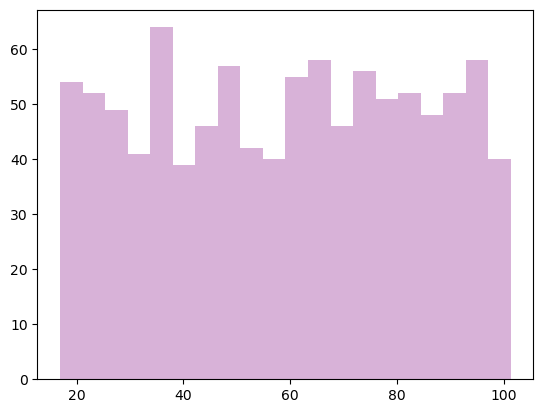

In [55]:
#Use matplotlib to plot a histogram of prices (in dollars) with 20 bins
n, bins, patches = plt.hist(df['Price'], bins = 20, facecolor = 'purple', alpha = 0.3)
plt.show()

In [56]:
# finding the rating frequency distribution (count of books) for all star ratings.
# Rating Distribution found by getting the length of the "list" where the rating value equals the specified rating
print("One Star: " + str(len(df[df['Rating'] == 'One'])))
print("Two Star: " + str(len(df[df['Rating'] == 'Two'])))
print("Three Star: " + str(len(df[df['Rating'] == 'Three'])))
print("Four Star: " + str(len(df[df['Rating'] == 'Four'])))
print("Five Star: " + str(len(df[df['Rating'] == 'Five'])))

One Star: 226
Two Star: 196
Three Star: 203
Four Star: 179
Five Star: 196


Text(0.5, 1.0, 'Number of Books per Rating')

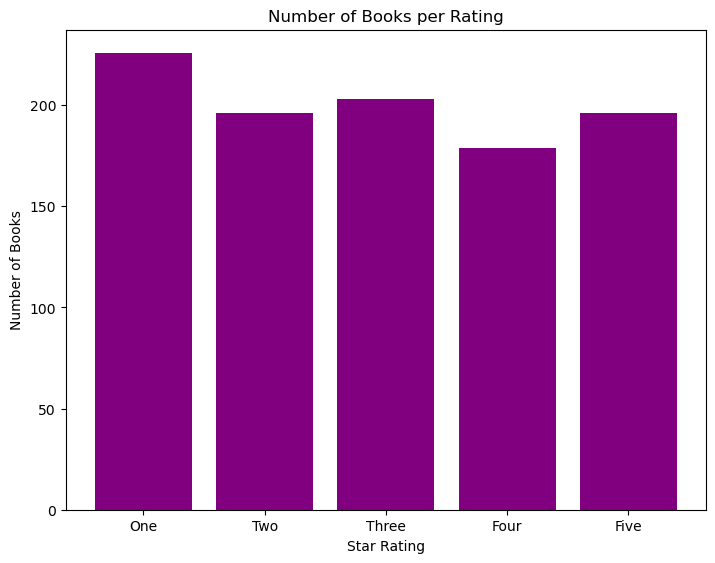

In [59]:
# Create a list for the x and y axis labels for a bar plot
x_bar = ['One', 'Two', 'Three', 'Four', 'Five']
y_bar = [len(df[df['Rating'] == 'One']), len(df[df['Rating'] == 'Two']), len(df[df['Rating'] == 'Three']),
        len(df[df['Rating'] == 'Four']), len(df[df['Rating'] == 'Five'])]


# Use matplotlib to plot the bar plot
plot = plt.figure()
axis = plot.add_axes([0,0,1,1])

axis.bar(x_bar, y_bar)

# Change the x axis title, y axis title, and main title of plot
plt.xlabel("Star Rating")
plt.ylabel("Number of Books")
plt.title("Number of Books per Rating")

#plt.show()  #needed in script files .py (eg in spyder)


### That's it! You are done!


### REMINDER: as mentioned at the beginning of this file, when you are done, submit both your modified Lab4.ipynb file and its html version Lab4.html. To convert ipynb to html, inside Jupyter dashbord (where your ipynb is open), go to File  →  Donwload as  →  HTML (.html)

### IMPORTANT: Save to html AFTER you run all the cells and the output is printed out.

<br>



### Appendix


##### Here is some more code, for getting the number of books in each category (get url links from main page for all catgories, go through this links and get the number of books per category)

In [60]:
# Create a new data frame for catgories with specific column headers
columnHeaders = ['Category','Count']
cat_df = pd.DataFrame(columns = columnHeaders)

# Define main url to get all categories, get the page requested, and turn html content into a soup object
url = 'http://books.toscrape.com/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

# Find the section tag that contains all the category urls
categories = soup.find('ul', attrs={'class':'nav nav-list'})

# Find all the tags, within the categories variable, that contains the links
categories_list = categories.find_all('a')

# Get all the links from this list of tags
for i in range(len(categories_list)):
    categories_list[i] = categories_list[i].get('href')

# Iterate through the list of category htmls
for i in categories_list:
    # For each category, go to the page associted with that category and turn it into a soup object
    url = 'http://books.toscrape.com/' + i
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Find the category name and number of books within that category
    cat_title = soup.find('div', attrs={'class':'page-header action'}).h1.get_text()
    num_books = soup.find('form', attrs={'class':'form-horizontal'}).strong.get_text()
    
    # Append to the dataframe the category and number of books
    cat_df = cat_df.append({'Category': cat_title, 'Count': num_books}, ignore_index = True)

What is the distribution of books within each category? Here is the answer.

In [61]:
# Sort the category list by count of books and print out the distribution
cat_df['Count'] = cat_df['Count'].astype(int)
cat_df = cat_df.sort_values(by=['Count'])
cat_df = cat_df.reset_index(drop=True)
print(cat_df)

              Category  Count
0                Crime      1
1              Erotica      1
2            Parenting      1
3        Adult Fiction      1
4             Suspense      1
5             Academic      1
6               Novels      1
7             Cultural      1
8        Short Stories      1
9           Paranormal      1
10          Historical      2
11           Christian      3
12        Contemporary      3
13            Politics      3
14              Health      4
15           Self Help      5
16           Biography      5
17    Sports and Games      5
18           New Adult      6
19        Spirituality      6
20   Christian Fiction      6
21          Psychology      7
22            Religion      7
23                 Art      8
24       Autobiography      9
25               Humor     10
26            Thriller     11
27              Travel     11
28          Philosophy     11
29            Business     12
30               Music     13
31             Science     14
32     Sci

### REMINDER: as mentioned at the beginning of this file, when you are done, submit both your modified Lab4.ipynb file and its html version Lab4.html. To convert ipynb to html, inside Jupyter dashbord (where your ipynb is open), go to File  →  Donwload as  →  HTML (.html)

### IMPORTANT: Save to html AFTER you run all the cells and the output is printed out.


